In [26]:
from qiskit import *
from qiskit_aer import Aer,AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np




In [35]:
#define the oracle circuit
oracle = QuantumCircuit(2,name="oracle")
oracle.cz(0,1)
oracle.to_gate()
oracle_instruction = oracle.to_instruction()  # Convert to instruction

#Draw the oracle circuit
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [36]:
backend = Aer.get_backend("statevector_simulator")
#create Grover's circuit
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1]) # Apply Hadamard Gates
grover_circ.append(oracle,[0,1]) #Append oracle instruction
grover_circ.save_statevector() # Save statevector for analysis
grover_circ.draw()

┌───┐┌─────────┐ statevector 
q_0: ┤ H ├┤0        ├──────░──────
     ├───┤│  oracle │      ░      
q_1: ┤ H ├┤1        ├──────░──────
     └───┘└─────────┘      ░      
c: 2/═════════════════════════════

In [37]:

# Use AerSimulator to run the circuit
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(grover_circ, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

In [38]:
# Get the statevector result
statevector= result.get_statevector()
np.around(statevector,2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [39]:
# Define the reflection circuit and convert to instruction
reflection = QuantumCircuit(2, name="reflection")
reflection.h([0, 1])
reflection.z([0, 1])
reflection.cz(0, 1)
reflection.h([0, 1])
reflection_instruction = reflection.to_instruction()  # Convert to instruction

In [40]:
# Draw the reflection circuit
reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [41]:
backend = Aer.get_backend("qasm_simulator")

# Define a new Grover's circuit for the full algorithm
grover_circ = QuantumCircuit(2, 2)
grover_circ.h([0, 1])  # Apply Hadamard gates
grover_circ.append(oracle_instruction, [0, 1])  # Append oracle
grover_circ.append(reflection_instruction, [0, 1])  # Append reflection
grover_circ.measure([0, 1], [0, 1])  # Add measurement
grover_circ.draw()


┌───┐┌─────────┐┌─────────────┐┌─┐   
q_0: ┤ H ├┤0        ├┤0            ├┤M├───
     ├───┤│  oracle ││  reflection │└╥┘┌─┐
q_1: ┤ H ├┤1        ├┤1            ├─╫─┤M├
     └───┘└─────────┘└─────────────┘ ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

In [42]:
grover_circ.draw()

┌───┐┌─────────┐┌─────────────┐┌─┐   
q_0: ┤ H ├┤0        ├┤0            ├┤M├───
     ├───┤│  oracle ││  reflection │└╥┘┌─┐
q_1: ┤ H ├┤1        ├┤1            ├─╫─┤M├
     └───┘└─────────┘└─────────────┘ ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

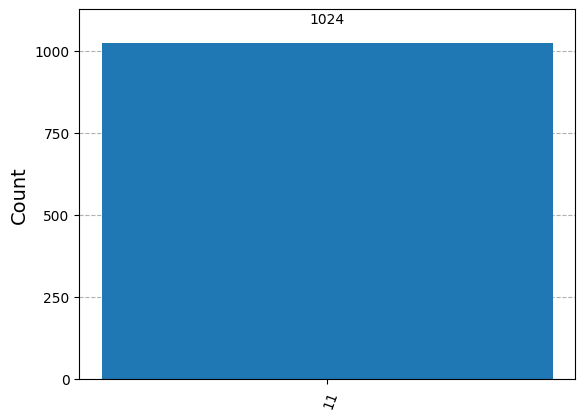

In [44]:
# Run the final Grover's algorithm on the simulator
compiled_circuit = transpile(grover_circ, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get the counts for the measurements
counts = result.get_counts()
plot_histogram(counts)
